In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
cachedStopWords = stopwords.words("english")

def replace_special_character(document):
    result = re.sub('[^a-zA-Z\n\.]', ' ', document).replace('.', ' ')
    result = ' '.join(result.split())
    result = "".join(result.splitlines())
    result=re.sub(r'\b\w{1,3}\b', '', result)
    return result.strip()

def removestopword(document):
  text = ' '.join([word for word in document.strip().lower().split() if word not in cachedStopWords])
  return text

def readTrain(file):
  data_frame = pd.read_csv(file, names = ['id','title','content','tags'])
  print('finished reading files ... ')
  
  data_frame['title'] = data_frame['title'].apply(lambda x : x.decode('utf-8'))
  data_frame['content'] = data_frame['content'].apply(lambda x : x.decode('utf-8'))
  
  data_frame['text'] = data_frame[['title', 'content']].apply(lambda x : ''.join(x), axis = 1)
  data_frame['text'] = data_frame['text'].apply(lambda x : removestopword(x))
  data_frame['text'] = data_frame['text'].apply(lambda x : replace_special_character(x))

  data_frame['tags'] = data_frame['tags'].apply(lambda x : x.split(' '))
  data_frame.drop('title', 1, inplace= True)
  data_frame.drop('content', 1, inplace= True)
  print('finished cleaning...')
  return data_frame

def readTrainingDataSet():
  files = ['./data/cooking_short.csv','./data/crypto_short.csv']
  train_data_frames = []
  for f in files:
    train_data_frames.append(readTrain(f))
  return pd.concat(train_data_frames)

word_dict = {}
word_freq = {}
def assign_ids(document):
  doc = document.split()
  for w in doc:
    if w not in word_dict:  # assigning ID to the words
      word_dict[w] = len(word_dict)
    if w not in word_freq:  # creating the frequency count for the words
      word_freq[w] = 1
    else:
      word_freq[w] += 1
  return

def create_feature_ids(data_frame):
  data_frame['text'].apply(lambda x: assign_ids(x))


train_data_frame = None
test_data_frame = None

In [6]:
train_data_frame = readTrainingDataSet()
create_feature_ids(train_data_frame)

finished reading files ... 
finished cleaning...
finished reading files ... 
finished cleaning...


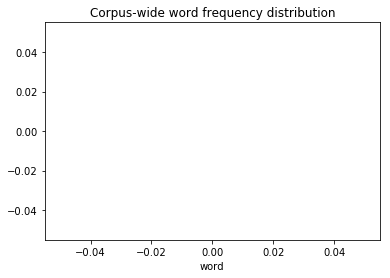

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sorted(word_freq.values(), reverse=True))
plt.xlabel('word')
# plt.ylabel('log(frequency)')
# plt.yscale('log')
plt.title('Corpus-wide word frequency distribution')